In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_csv("C:/Users/bhada/OneDrive/Documents/wysa/train.csv")

print(df.head())
# print(df['tweet_text'][0])
# print(df['emotion_in_tweet_is_directed_at'][0])
# print(df['is_there_an_emotion_directed_at_a_brand_or_product'][0])


                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion  


In [2]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing 'tweet_text' values
df = df.dropna(subset=['tweet_text'])

# Convert 'tweet_text' to string to avoid float type issues
df['tweet_text'] = df['tweet_text'].astype(str)

# Display basic information about the dataset
print(df.info())


tweet_text                                               1
emotion_in_tweet_is_directed_at                       5298
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 8588 entries, 0 to 8588
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8588 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8588 non-null   object
dtypes: object(3)
memory usage: 268.4+ KB
None


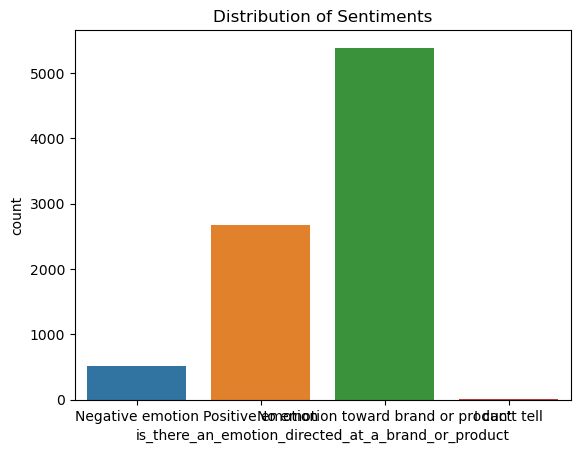

In [3]:
# Visualize the distribution of sentiments
sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=df)
plt.title('Distribution of Sentiments')
plt.show()


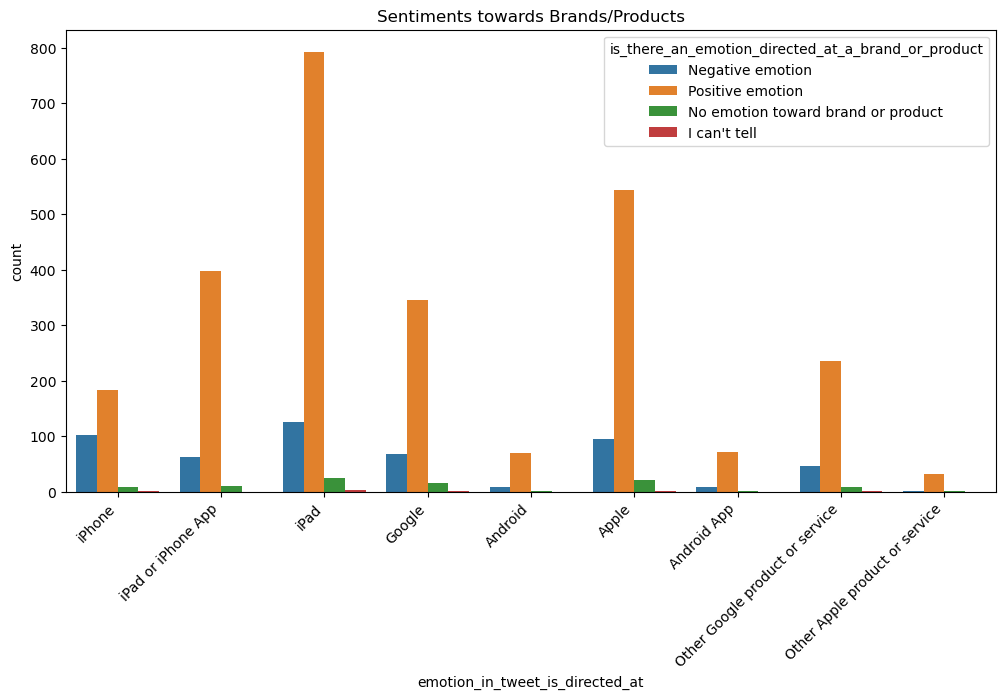

In [4]:

# Visualize sentiments directed at specific brands/products
plt.figure(figsize=(12, 6))
sns.countplot(x='emotion_in_tweet_is_directed_at', hue='is_there_an_emotion_directed_at_a_brand_or_product', data=df)
plt.title('Sentiments towards Brands/Products')
plt.xticks(rotation=45, ha='right')
plt.show()


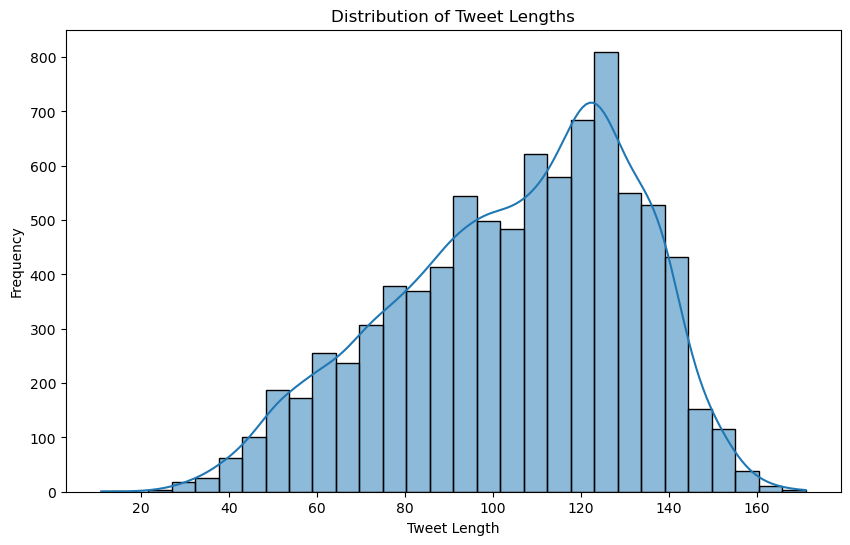

In [5]:

# Analyze the distribution of tweet lengths
df['tweet_length'] = df['tweet_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


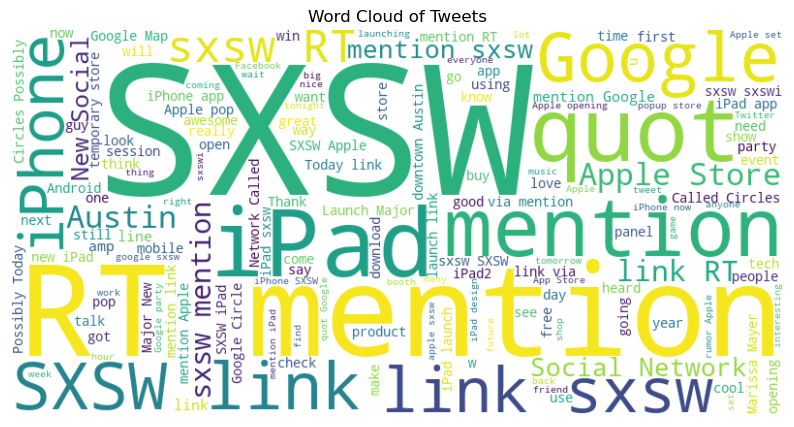

In [6]:

# Explore the most frequent words in the tweets
text = ' '.join(df['tweet_text'].astype(str))
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()
